# Deeper Neural Networks - Lab

## Introduction

In this lesson, we'll dig deeper into the work horse of deep learning, **_Multi-Layer Perceptrons_**! We'll build and train a couple of different MLPs with Keras and explore the tradeoffs that come with adding extra hidden layers. We'll also try switching between some of the activation functions we learned about in the previous lesson to see how they affect training and performance. 


## Objectives

- Build a deep neural network using Keras 


## Getting Started

Run the cell below to import everything we'll need for this lab. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [5]:
# !pip install -U tensorflow

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense


For this lab, we'll be working with the [Boston Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). Although we're importing this dataset directly from scikit-learn, the Kaggle link above contains a detailed explanation of the dataset, in case you're interested. We recommend you take a minute to familiarize yourself with the dataset before digging in. 

In the cell below:

* Call `load_breast_cancer()` to store the dataset  
* Access the `.data`, `.target`, and `.feature_names` attributes and store them in the appropriate variables below 

In [7]:
bc_dataset = load_breast_cancer()
data = bc_dataset.data
target = bc_dataset.target
col_names = bc_dataset.feature_names


Now, let's create a DataFrame so that we can see the data and explore it a bit more easily with the column names attached. 

- In the cell below, create a pandas DataFrame from `data` (use `col_names` for column names)  
- Print the `.head()` of the DataFrame 

In [8]:
df = pd.DataFrame(data, columns=col_names)
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Getting the Data Ready for Deep Learning

In order to pass this data into a neural network, we'll need to make sure that the data:

* is purely numerical
* contains no missing values
* is normalized 

Let's begin by calling the DataFrame's `.info()` method to check the datatype of each feature. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

From the output above, we can see that the entire dataset is already in numerical format. We can also see from the counts that each feature has the same number of entries as the number of rows in the DataFrame -- that means that no feature contains any missing values. Great!

Now, let's check to see if our data needs to be normalized. Instead of doing statistical tests here, let's just take a quick look at the `.head()` of the DataFrame again. Do this in the cell below. 

In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


As we can see from comparing `mean radius` and `mean area`, columns are clearly on different scales, which means that we need to normalize our dataset. To do this, we'll make use of scikit-learn's `StandardScaler()` class. 

In the cell below, instantiate a `StandardScaler` and use it to create a normalized version of our dataset. 

In [12]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## Binarizing our Labels

If you took a look at the data dictionary on Kaggle, then you probably noticed the target for this dataset is to predict if the sample is "M" (Malignant) or "B" (Benign). This means that this is a **_Binary Classification_** task, so we'll need to binarize our labels. 

In the cell below, make use of scikit-learn's `LabelBinarizer()` class to create a binarized version of our labels. 

In [13]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [16]:
binarizer = LabelBinarizer()
labels = binarizer.fit_transform(target)
labels[0]

array([0])

## Building our MLP

Now, we'll build a small **_Multi-Layer Perceptron_** using Keras in the cell below. Our first model will act as a baseline, and then we'll make it bigger to see what happens to model performance. 

In the cell below:

* Instantiate a `Sequential()` Keras model   
* Use the model's `.add()` method to add a `Dense` layer with 10 neurons and a `'tanh'` activation function. Also set the `input_shape` attribute to `(30,)`, since we have 30 features  
* Since this is a binary classification task, the output layer should be a `Dense` layer with a single neuron, and the activation set to `'sigmoid'` 

In [17]:
model_1 = Sequential()
model_1.add( Dense(10,activation='tanh',input_shape=(30,)))
model_1.add( Dense(1, activation='sigmoid'))
model_1.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model

Now that we've created the model, the next step is to compile it. 

In the cell below, compile the model. Set the following hyperparameters:

* `loss='binary_crossentropy'`
* `optimizer='sgd'`
* `metrics=['acc']`

In [18]:
model_1 = Sequential()
model_1.add( Dense(10,activation='tanh',input_shape=(30,)))
model_1.add( Dense(1, activation='sigmoid'))
model_1.summary()


model_1.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])

### Fitting the Model

Now, let's fit the model. Set the following hyperparameters:

* `epochs=25`
* `batch_size=1`
* `validation_split=0.2`

In [19]:
results_1 = model_1.fit(scaled_data,labels,epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
455/455 [==============================] - 0s 989us/step - loss: 0.2441 - acc: 0.9209 - val_loss: 0.1813 - val_acc: 0.9386
Epoch 2/25
455/455 [==============================] - 0s 732us/step - loss: 0.1169 - acc: 0.9648 - val_loss: 0.1485 - val_acc: 0.9561
Epoch 3/25
455/455 [==============================] - 0s 741us/step - loss: 0.0916 - acc: 0.9736 - val_loss: 0.1289 - val_acc: 0.9649
Epoch 4/25
455/455 [==============================] - 0s 743us/step - loss: 0.0806 - acc: 0.9758 - val_loss: 0.1232 - val_acc: 0.9649
Epoch 5/25
455/455 [==============================] - 0s 734us/step - loss: 0.0739 - acc: 0.9780 - val_loss: 0.1242 - val_acc: 0.9561
Epoch 6/25
455/455 [==============================] - 0s 734us/step - loss: 0.0696 - acc: 0.9780 - val_loss: 0.1119 - val_acc: 0.9649
Epoch 7/25
455/455 [==============================] - 0s 1ms/step - loss: 0.0663 - acc: 0.9780 - val_loss: 0.1094 - val_acc: 0.9649
Epoch 8/25
455/455 [==============================] - 0s 794us/s

Note that when you call a Keras model's `.fit()` method, it returns a Keras callback containing information on the training process of the model. If you examine the callback's `.history` attribute, you'll find a dictionary containing both the training and validation loss, as well as any metrics we specified when compiling the model (in this case, just accuracy). 

Let's quickly plot our validation and accuracy curves and see if we notice anything. Since we'll want to do this anytime we train an MLP, its worth wrapping this code in a function so that we can easily reuse it. 

In the cell below, we created a function for visualizing the loss and accuracy metrics. 

In [20]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

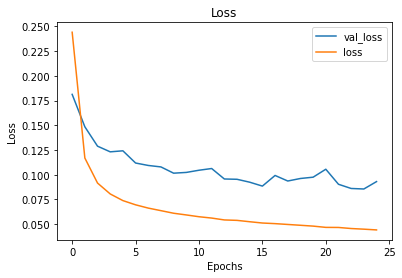

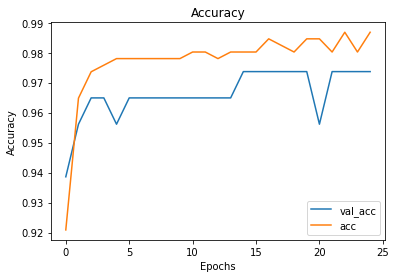

In [21]:
visualize_training_results(results_1)

## Detecting Overfitting

You'll probably notice that the model did pretty well! It's always recommended to visualize your training and validation metrics against each other after training a model. By plotting them like this, we can easily detect when the model is starting to overfit. We can tell that this is happening by seeing the model's training performance steadily improve long after the validation performance plateaus. We can see that in the plots above as the training loss continues to decrease and the training accuracy continues to increase, and the distance between the two lines gets greater as the epochs gets higher. 

## Iterating on the Model

By adding another hidden layer, we can a given the model the ability to capture more high-level abstraction in the data. However, increasing the depth of the model also increases the amount of data the model needs to converge to answer, because with a more complex model comes the "Curse of Dimensionality", thanks to all the extra trainable parameters that come from adding more size to our network. 

If there is complexity in the data that our smaller model was not big enough to catch, then a larger model may improve performance. However, if our dataset isn't big enough for the new, larger model, then we may see performance decrease as then model "thrashes" about a bit, failing to converge. Let's try and see what happens. 

In the cell below, recreate the model that you created above, with one exception. In the model below, add a second `Dense` layer with `'tanh'` activation function and 5 neurons after the first. The network's output layer should still be a `Dense` layer with a single neuron and a `'sigmoid'` activation function, since this is still a binary classification task. 

Create, compile, and fit the model in the cells below, and then visualize the results to compare the history. 

In [22]:
model_2  = Sequential()
model_2.add( Dense(10,activation='tanh',input_shape=(30,)))
model_2.add( Dense(5, activation='tanh'))
model_2.add( Dense(1, activation='sigmoid'))


model_2.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [23]:
results_2 = model_2.fit(scaled_data,labels,epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
455/455 [==============================] - 0s 989us/step - loss: 0.2851 - acc: 0.9187 - val_loss: 0.1787 - val_acc: 0.9649
Epoch 2/25
455/455 [==============================] - 0s 817us/step - loss: 0.1282 - acc: 0.9736 - val_loss: 0.1349 - val_acc: 0.9561
Epoch 3/25
455/455 [==============================] - 0s 784us/step - loss: 0.0946 - acc: 0.9736 - val_loss: 0.0969 - val_acc: 0.9561
Epoch 4/25
455/455 [==============================] - 0s 958us/step - loss: 0.0809 - acc: 0.9824 - val_loss: 0.1013 - val_acc: 0.9649
Epoch 5/25
455/455 [==============================] - 0s 810us/step - loss: 0.0717 - acc: 0.9846 - val_loss: 0.0768 - val_acc: 0.9825
Epoch 6/25
455/455 [==============================] - 0s 816us/step - loss: 0.0688 - acc: 0.9846 - val_loss: 0.0836 - val_acc: 0.9649
Epoch 7/25
455/455 [==============================] - 0s 776us/step - loss: 0.0637 - acc: 0.9824 - val_loss: 0.0754 - val_acc: 0.9737
Epoch 8/25
455/455 [==============================] - 0s 770us

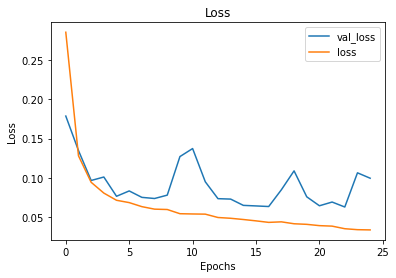

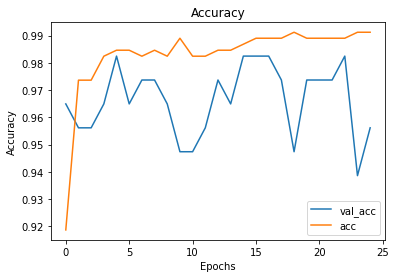

In [24]:
visualize_training_results(results_2)

## What Happened?

Although the final validation score for both models is the same, this model is clearly worse because it hasn't converged yet. We can tell because of the greater variance in the movement of the `val_loss` and `val_acc` lines. This suggests that we can remedy this by either:

* Decreasing the size of the network, or
* Increasing the size of our training data 

## Visualizing why we Normalize our Data

As a final exercise, let's create a third model that is the same as the first model we created earlier. The only difference is that we will train it on our raw dataset, not the normalized version. This way, we can see how much of a difference normalizing our input data makes.

Create, compile, and fit a model in the cell below. The only change in parameters will be using `data` instead of `scaled_data` during the `.fit()` step. 

In [25]:
model_3  = Sequential()
model_3.add( Dense(10,activation='tanh',input_shape=(30,)))
model_3.add( Dense(1, activation='sigmoid'))
model_3.summary()


model_3.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [26]:
results_3 = model_3.fit(df,labels,epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
455/455 [==============================] - 0s 945us/step - loss: 0.6830 - acc: 0.5780 - val_loss: 0.5621 - val_acc: 0.7719
Epoch 2/25
455/455 [==============================] - 0s 782us/step - loss: 0.6815 - acc: 0.5714 - val_loss: 0.6122 - val_acc: 0.7719
Epoch 3/25
455/455 [==============================] - 0s 785us/step - loss: 0.6844 - acc: 0.5780 - val_loss: 0.6478 - val_acc: 0.7719
Epoch 4/25
455/455 [==============================] - 0s 775us/step - loss: 0.6834 - acc: 0.5780 - val_loss: 0.5728 - val_acc: 0.7719
Epoch 5/25
455/455 [==============================] - 0s 743us/step - loss: 0.6839 - acc: 0.5890 - val_loss: 0.6550 - val_acc: 0.7719
Epoch 6/25
455/455 [==============================] - 0s 743us/step - loss: 0.6807 - acc: 0.5736 - val_loss: 0.5579 - val_acc: 0.7719
Epoch 7/25
455/455 [==============================] - 0s 735us/step - loss: 0.6841 - acc: 0.5912 - val_loss: 0.6858 - val_acc: 0.7719
Epoch 8/25
455/455 [==============================] - 0s 744us

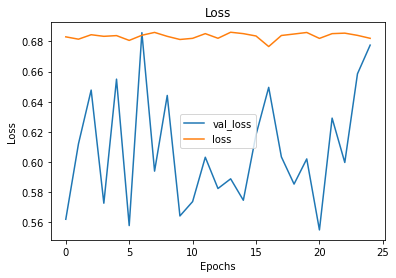

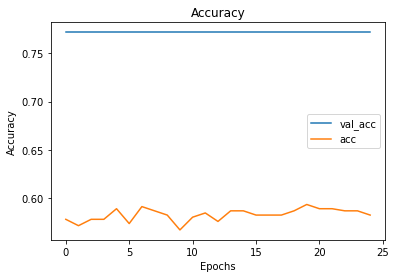

In [27]:
visualize_training_results(results_3)

Wow! Our results were much worse -- over 20% poorer performance when working with non-normalized input data!  


## Summary

In this lab, we got some practice creating **_Multi-Layer Perceptrons_**, and explored how things like the number of layers in a model and data normalization affect our overall training results!

# Study Group Level-UP

> Compare the training results for StandardScaled vs MinMaxScaled data

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler  = MinMaxScaler()
minmax_data = scaler.fit_transform(df)

In [30]:
minmax_data

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [31]:
model_3  = Sequential()
model_3.add( Dense(10,activation='tanh',input_shape=(30,)))
model_3.add( Dense(1, activation='sigmoid'))
model_3.summary()


model_3.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])
results_3 = model_3.fit(minmax_data,labels,epochs=25, batch_size=1, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
455/455 [==============================] - 0s 987us/step - loss: 0.5790 - acc: 0.7538 - val_loss: 0.4680 - val_acc: 0.9474
Epoch 2/25
455/455 [==============================] - 0s 748us/step - loss: 0.3823 - acc: 0.9187 - val_loss: 0.2978 - val_acc: 0.9649
Epoch 3/25
455/455 [==============================] - 0s 780us/step - loss: 0.2787 - acc: 0.9385 - val_loss: 0.2796 - val_acc: 0.9298
Epoch 4/25
455/455 [==============================] - 0s 805us/step - loss: 0.2231 - acc: 0.9385 - val_loss: 0.2492 

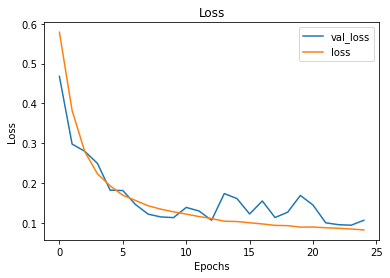

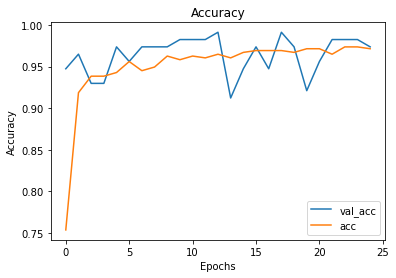

In [32]:

visualize_training_results(results_3)

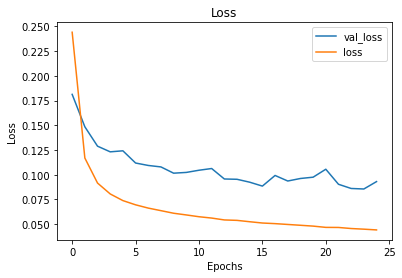

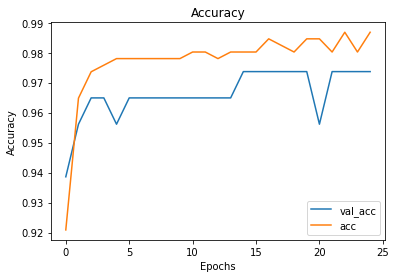

In [33]:
visualize_training_results(results_1)